In [1]:
import jpype

In [2]:
from konlpy.tag import Twitter   # konlpy는 형태소 분석에 사용
from collections import Counter  # counter는 단어 카운트

In [3]:
import os, re

여러 군데에 나누어져 있는 반응 하나로 합치기

In [4]:
speech_path = 'C:/Users/user/Desktop/Project_jupyter_notebook/speech_data'

In [5]:
os.listdir(speech_path)

['speech_1.txt',
 'speech_2.txt',
 'speech_3.txt',
 'speech_4.txt',
 'speech_5.txt']

In [6]:
for i in os.listdir(speech_path):
    path = os.path.join(speech_path, i)
    
    each_speech_data = open(path, "r", encoding="UTF-8").read()
    print(each_speech_data + '\n\n')

여러 번 죽었던 이 몸이 하나님의 은혜와 동포의 애호(愛護)로 지금까지 살아오다가 오늘에 이와 같이 영광스러운 추대(推戴)를 받은 나로서는 일변(一邊) 감격(感激)한 마음과 일변 심당(心當)키 어려운 책임을 지고 두려운 생각을 금하기 어렵습니다. 기쁨이 극(極)하면 우슴으로 변하여 눈물이 된다는 것을 글에서 보고 말을 들었든 것입니다. 요사이 나의 치하(致賀)하는 남여동포가 모다 눈물을 씻으며 고개를 돌립니다. 각처에서 축전 오는 것을 보면 모다 눈물을 금하기 어렵다합니다. 나는 본래 나의 감상으로 남에게 촉감(觸感)될 말을 하지 않기로 매양 힘쓰는 사람입니다. 그러나 목석간담(木石肝膽)이 아닌만치 뼈에 맺히는 눈물을 금하기 어려웁니다. 이것은 다름이 아니라 40년 전에 잃었던 나라를 다시 찾는 것이요 죽었던 민족이 다시 사는 것이 오날 이에서 표면(表面)되는 까닭입니다.

대통령 선서하는 이 자리에서 하나님과 동포 앞에서 나의 직무를 다하기로 일층(一層) 더 결심하며 맹서합니다. 따라서 여러 동포들도 오늘 한층 더 분발해서 각각 자기의 몸을 잊어버리고 민족전체의 행복을 위하여 대한민국의 국민 된 영광스럽고 신성한 직책을 다 하도록 마음으로 맹서하기를 바랍니다. 여러분이 나에게 맡기는 직책은 누구나 한사람의 힘으로 성공할 수는 없는 것입니다. 이 중대한 책임을 내가 용감히 부담할 때에 내 기능이나 지혜를 믿고 나서는 것이 결코 아니며 전혀 애국남여의 합의 합력함으로만 진행할 수 있는 것을 믿는 바입니다. 이번 우리 총선거의 대성공을 모든 우방들이 칭찬하기에 이른 것은 우리애국남여가 단순한 애국정신으로 각각 직책을 다한 연고(緣故)입니다. 그 결과로 국회성립이 또한 완전무결한 민주주의제로 조직되어 2, 3 정당이 그 안에 대표가 되었고 무소속과 좌익색태(左翼色態)로 주목받은 대의원이 또한 여럿이 있게 된 것입니다.

기왕 경험으로 추측하면 이 많은 국회의원 중에서 사상충돌로 분쟁분열을 염려한 사람들이 없지 않았던 것입니다. 그러나 중대 문제에 대하여 종종 극열한

In [7]:
test_data = {}
test_data['txt'] = []

for i in os.listdir(speech_path):
    path = os.path.join(speech_path, i)
    each_speech_data = open(path, "r", encoding="UTF-8").read()
    test_data['txt'].append(each_speech_data)

## 형태소 나누기

In [10]:
twitter = Twitter()
speech_data = []

for sentence in test_data['txt']:
    speech_data.append(twitter.pos(sentence))

print(speech_data)

[[('여러', 'Noun'), ('번', 'Noun'), ('죽었던', 'Verb'), ('이', 'Noun'), ('몸', 'Noun'), ('이', 'Josa'), ('하나님', 'Noun'), ('의', 'Josa'), ('은혜', 'Noun'), ('와', 'Josa'), ('동포', 'Noun'), ('의', 'Josa'), ('애호', 'Noun'), ('(', 'Punctuation'), ('愛護', 'Foreign'), (')', 'Punctuation'), ('로', 'Noun'), ('지금', 'Noun'), ('까지', 'Josa'), ('살아오다가', 'Verb'), ('오늘', 'Noun'), ('에', 'Josa'), ('이', 'Noun'), ('와', 'Josa'), ('같이', 'Adverb'), ('영광', 'Noun'), ('스러운', 'Josa'), ('추대', 'Noun'), ('(', 'Punctuation'), ('推戴', 'Foreign'), (')', 'Punctuation'), ('를', 'Noun'), ('받은', 'Verb'), ('나로', 'Noun'), ('서는', 'Verb'), ('일변', 'Noun'), ('(', 'Punctuation'), ('一邊', 'Foreign'), (')', 'Punctuation'), ('감격', 'Noun'), ('(', 'Punctuation'), ('感激', 'Foreign'), (')', 'Punctuation'), ('한', 'Verb'), ('마음', 'Noun'), ('과', 'Josa'), ('일변', 'Noun'), ('심당', 'Verb'), ('(', 'Punctuation'), ('心當', 'Foreign'), (')', 'Punctuation'), ('키', 'Noun'), ('어려운', 'Adjective'), ('책임', 'Noun'), ('을', 'Josa'), ('지고', 'Noun'), ('두려운', 'Adjective'), ('생각', 

## 명사, 형용사, 부사만 추출

In [15]:
non_word_data = []

for sentence in speech_data :
    for word, tag in sentence :
        if tag in ['Noun'] and ("이" not in word) and ("의" not in word) and ("에" not in word) and ("로" not in word) and ("으로" not in word) and ("것" not in word) and ("을" not in word) and ("를" not in word) and ("는" not in word) and ("과" not in word) and ("은" not in word) and("그" not in word) :
            non_word_data.append(word)

print(non_word_data)

['여러', '번', '몸', '하나님', '동포', '애호', '지금', '오늘', '영광', '추대', '일변', '감격', '마음', '일변', '키', '책임', '지고', '생각', '금', '기쁨', '우슴', '눈물', '글', '보고', '말', '나', '치하', '남여', '동포', '모', '눈물', '고개', '각처', '축전', '모', '눈물', '금', '나', '본래', '나', '감상', '남', '촉감', '말', '매양', '사람', '목석', '간담', '뼈', '눈물', '금', '어려웁니', '전', '나라', '다시', '민족', '다시', '날', '표면', '까닭', '대통령', '선서', '자리', '하나님', '동포', '앞', '나', '직무', '층', '더', '결심', '맹서', '따라서', '여러', '동포', '오늘', '한층', '더', '분발', '각각', '자기', '몸', '민족', '전체', '행복', '위', '대한민국', '국민', '영광', '직책', '마음', '맹서', '여러분', '나', '직책', '누구', '사람', '힘', '수', '책임', '내', '부담', '때', '내', '기능', '지혜', '결코', '전혀', '애국', '남여', '합력', '함', '진행', '수', '바', '우리', '총선거', '대성공', '모든', '우방', '칭찬', '우리', '애국', '남여', '애국', '정신', '각각', '직책', '다한', '연고', '국회', '성립', '또한', '완전무결', '조직', '정당', '안', '대표', '무소속', '좌익', '색태', '주목', '또한', '여럿', '기왕', '경험', '추측', '중', '사상', '충돌', '분쟁', '분열', '염려', '사람', '중대', '문제', '대하', '종종', '쟁론', '필경', '표결', '때', '자유', '표시', '순리', '진행', '헌법', '제정', '정부조직법', '민', 

In [16]:
count = Counter(non_word_data)
words = dict(count.most_common())

words

{'우리': 110,
 '정부': 40,
 '나라': 26,
 '모든': 26,
 '수': 22,
 '자유': 22,
 '사람': 20,
 '바': 19,
 '세계': 16,
 '말': 15,
 '지금': 14,
 '나': 14,
 '중': 14,
 '또': 14,
 '민족': 13,
 '내': 13,
 '진행': 13,
 '일': 12,
 '동포': 11,
 '친선': 11,
 '다시': 10,
 '국민': 10,
 '때': 10,
 '생각': 9,
 '남': 9,
 '자기': 9,
 '위': 9,
 '임명': 9,
 '평화': 9,
 '민주': 9,
 '오늘': 8,
 '자리': 8,
 '결심': 8,
 '우방': 8,
 '정당': 8,
 '독립': 8,
 '권리': 8,
 '책임': 7,
 '앞': 7,
 '결코': 7,
 '국회': 7,
 '기왕': 7,
 '사상': 7,
 '문제': 7,
 '두': 7,
 '개인': 7,
 '새': 7,
 '동안': 7,
 '가장': 7,
 '정권': 7,
 '마음': 6,
 '날': 6,
 '더': 6,
 '또한': 6,
 '만일': 6,
 '분': 6,
 '외국': 6,
 '온': 6,
 '미국': 6,
 '노력': 6,
 '각각': 5,
 '대한민국': 5,
 '누구': 5,
 '애국': 5,
 '총선거': 5,
 '안': 5,
 '후': 5,
 '임': 5,
 '가지': 5,
 '반대': 5,
 '주장': 5,
 '치': 5,
 '건설': 5,
 '희생': 5,
 '역사': 5,
 '허락': 5,
 '보호': 5,
 '여러': 4,
 '금': 4,
 '눈물': 4,
 '전': 4,
 '직책': 4,
 '여러분': 4,
 '조직': 4,
 '대표': 4,
 '대하': 4,
 '국무총리': 4,
 '단체': 4,
 '뿐': 4,
 '못': 4,
 '절대': 4,
 '교제': 4,
 '대우': 4,
 '판단': 4,
 '우리나라': 4,
 '사랑': 4,
 '남녀': 4,
 '국가': 4,
 '더욱': 4,
 '다른

## 워드클라우드 만들기

In [23]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

import nltk
from nltk.corpus import stopwords
%matplotlib inline

import matplotlib
from IPython.display import set_matplotlib_formats
matplotlib.rc('font', family='Malgun Gothic')

set_matplotlib_formats('retina')

matplotlib.rc('axes', unicode_minus = False)

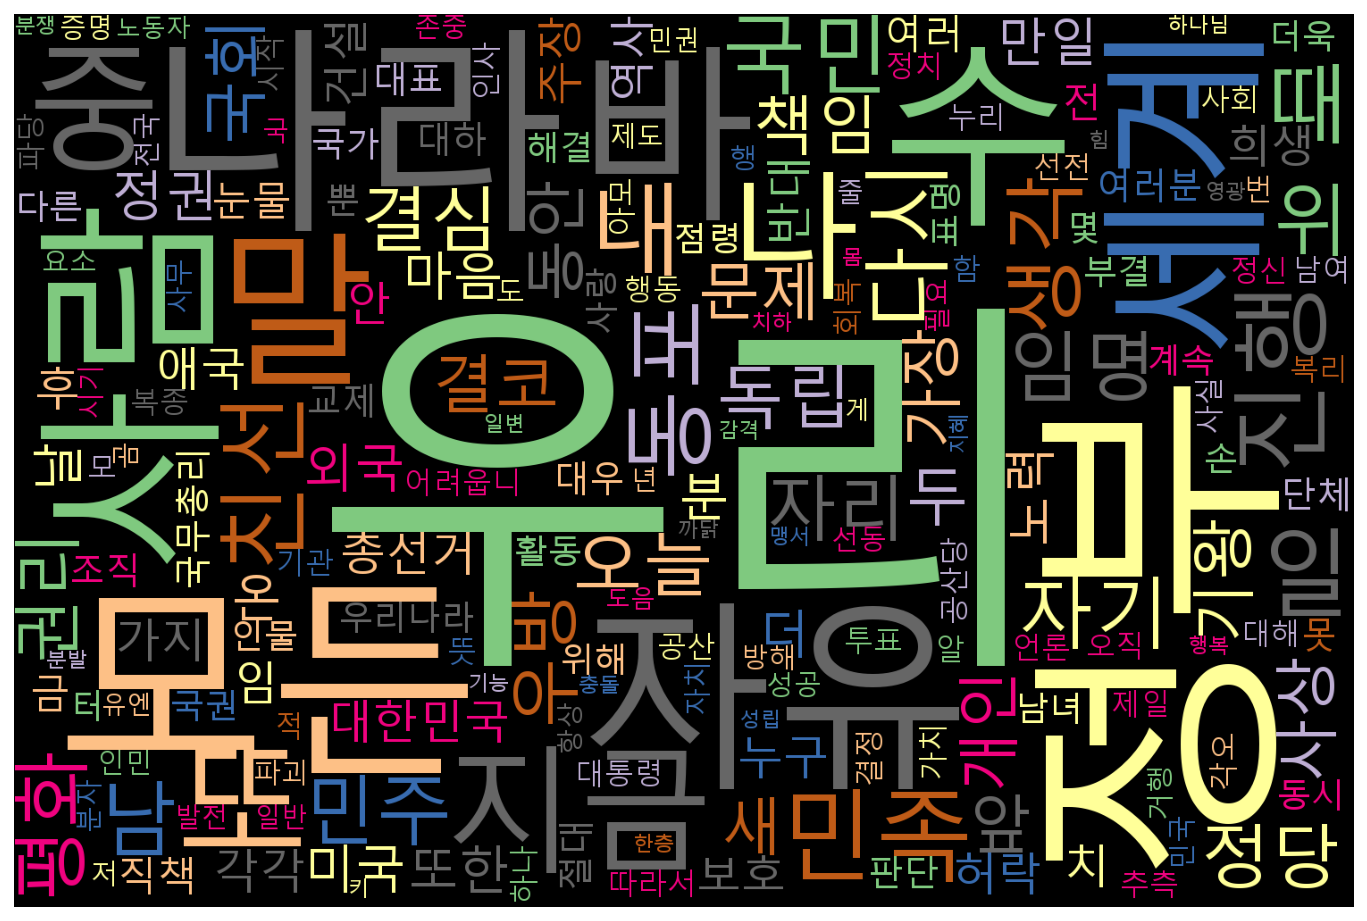

In [24]:
wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf',
                     background_color='black',
                     colormap='Accent_r',
                     width=1500,
                     height=1000).generate_from_frequencies(words)

fig = plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()
fig.savefig('wordcloud_test.png')